# Where the magic happens:

So this is supposed to be a cool plotting script. 

Firstly we must add our Imports. 
- Pandas is a library that will fetch the data from the CSV files
- Matplotlib is what we use to visualize our data in fine plots
- scipy.stats is a library we use to calculate the distribution of the data 
- Numpy is numpy. dont ask me what that is


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm


Next we need to fetch files of interest, in their chaotic state. 

In [2]:

test1_aws = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_1_AWS.csv'

test2_aws = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_2_AWS.csv'

test1_local = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_1_LOCAL.csv'
test2_local = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_2_LOCAL.csv'

test1_azure = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_1_AZURE.csv'
test2_azure = '/home/ubeyd/work/steinwurf/plots/results/results/6ktest_2_AZURE.csv'

We need to define a variable that makes it easier for us to save the plots

path is exactly what the name implies. it is the path to where we want to store our pics. 
The name variable in blue, is the name we are gonna give the plot we want to store where this path 
is leading us. 

In [8]:
path = "/home/ubeyd/work/steinwurf/plots/results/results/{name}"

Now define the function that is gonna fetch the data you need and format it in a manner that is easier to manage

The parameters we need to provide the summoning_jutsu is a variable that hold the path to our file. 

The function will return two lists, a list containing sequence numbers for all packets, and a list of round trip times for all the packets



In [3]:
def summoning_jutsu(file):
    chaos = pd.read_csv(file, usecols=['rtt', 'seq'])

    rtt = chaos['rtt']
    seq = chaos['seq']

    return seq, rtt
 

Now we need a function that will magically return two plots. 

- Y-axis represent RTT and x-axis represent sequence number 
- Complimentary Cumulative Distribution Function of the RTT values

In [14]:
def magic_timeline(seq, rtt, TimeLine_label,filename):
    
    # The magic to create a sequence x rtt plot. 
    fig, ax = plt.subplots()
    ax.plot(seq, rtt, label=TimeLine_label, color='b')
    ax.set_xlabel("Packet number")
    ax.set_ylabel("RTT/ms")
    ax.set_title('RTT for each packet, in the order they arrived')
    ax.legend()
    fig.savefig(path.format(name=filename))





In [25]:
def magic_ccdf(rtt1, rtt2, rtt3, fn1):
    # The magic to create a CCDF
    fig, ax = plt.subplots()

    
    count, bins_count = np.histogram(rtt1, bins=1000)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    
    count2, bins_count2 = np.histogram(rtt2, bins=1000)
    pdf2 = count2 / sum(count2)
    cdf2 = np.cumsum(pdf2)
    ccdf2 = 1 - cdf2

    count3, bins_count3 = np.histogram(rtt3, bins=1000)
    pdf3 = count3 / sum(count3)
    cdf3 = np.cumsum(pdf3)
    ccdf3 = 1 - cdf3


    ax.plot(bins_count[1:], ccdf, label= "PlaceHolder1" , color='tab:orange')
    ax.plot(bins_count2[1:], ccdf2, label= "PlaceHolder2" , color='tab:red')
    ax.plot(bins_count3[1:], ccdf3, label= "PlaceHolder3" , color='tab:blue')

    ax.set_xlabel("RTT Delay/ ms")
    ax.set_ylabel("Distribution")
    ax.set_xscale('log')
    ax.set_xlim(10*-1, 10**2)
    ax.set_yscale("log")   
    ax.set_ylim(10**-5, 10**0)

    fig.savefig(path.format(name=fn1))


In [10]:
def main():
    seq_aws, rtt_aws = summoning_jutsu(test1_aws)
    seq_azure, rtt_azure = summoning_jutsu(test1_azure)
    seq_local, rtt_local = summoning_jutsu(test1_local)

    magic_timeline(seq_aws, rtt_aws,'AWS','aws_timeline.png')
    magic_timeline(seq_azure, rtt_azure,'azure','azure_timeline.png')
    magic_timeline(seq_local, rtt_local,'local','local_timeline.png')

    magic_ccdf(rtt_aws, rtt_azure, rtt_local, 'ccdf_magic.png')



/tmp/ipykernel_210382/805737203.py:29: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(10*-1, 10**3)


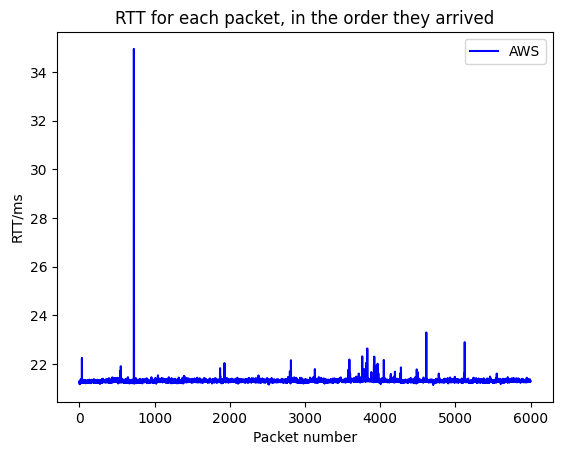

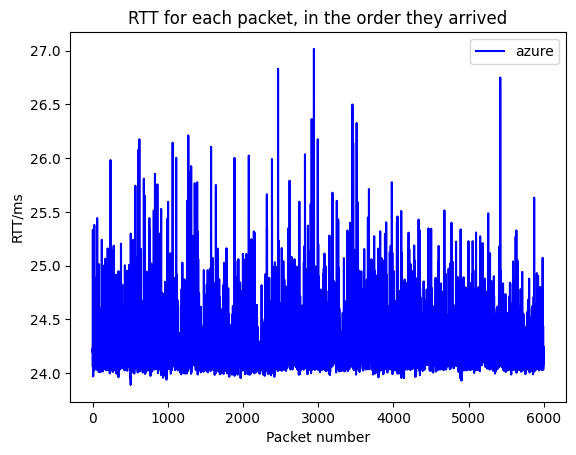

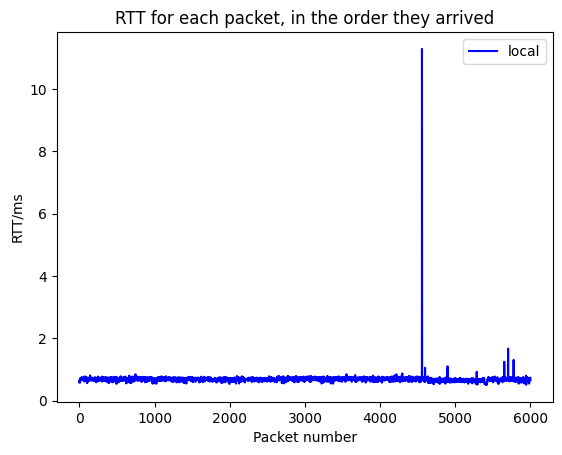

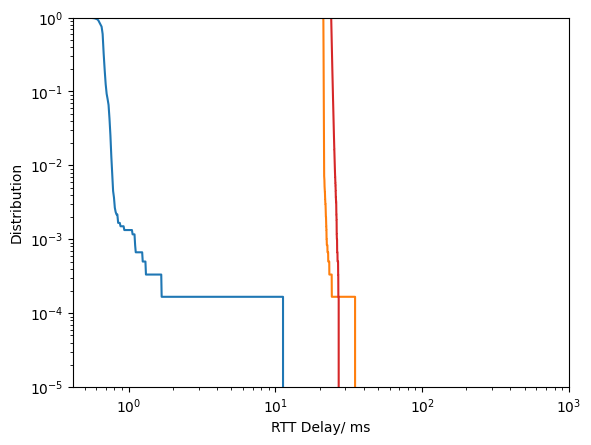

In [26]:
main()